In [ ]:
'https://www.kaggle.com/code/mbalvi75/08-knn-diabetes-dataset'
import os
import sys

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

root = os.path.dirname(os.path.abspath("."))
sys.path.append(root)

import predikit as pk

In [9]:
from predikit import Classifier

df = pd.read_csv('./sample_data/diabetes.csv')
print(df.head(3))


knn = Classifier(params={'n_neighbors': 5, 'p' : 2, 'metric' : 'euclidean'}, strategy='KNeighborsClassifier')


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  


2024-03-09 10:36:43,956 (__init__.py:350) - DEBUG: CACHEDIR=C:\Users\M\.matplotlib
2024-03-09 10:36:43,968 (font_manager.py:1574) - DEBUG: Using fontManager instance from C:\Users\M\.matplotlib\fontlist-v330.json
2024-03-09 10:36:44,813 (pyplot.py:414) - DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-03-09 10:36:44,818 (pyplot.py:414) - DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-03-09 10:36:44,842 (font_manager.py:1411) - DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-03-09 10:36:44,844 (font_manager.py:1423) - DEBUG: findfont: score(FontEntry(fname='e:\\College\\Graduation Project\\Python 3.11 Virtual Environment\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
2024-03-09 10:36:44,845 (font_manager.py:1

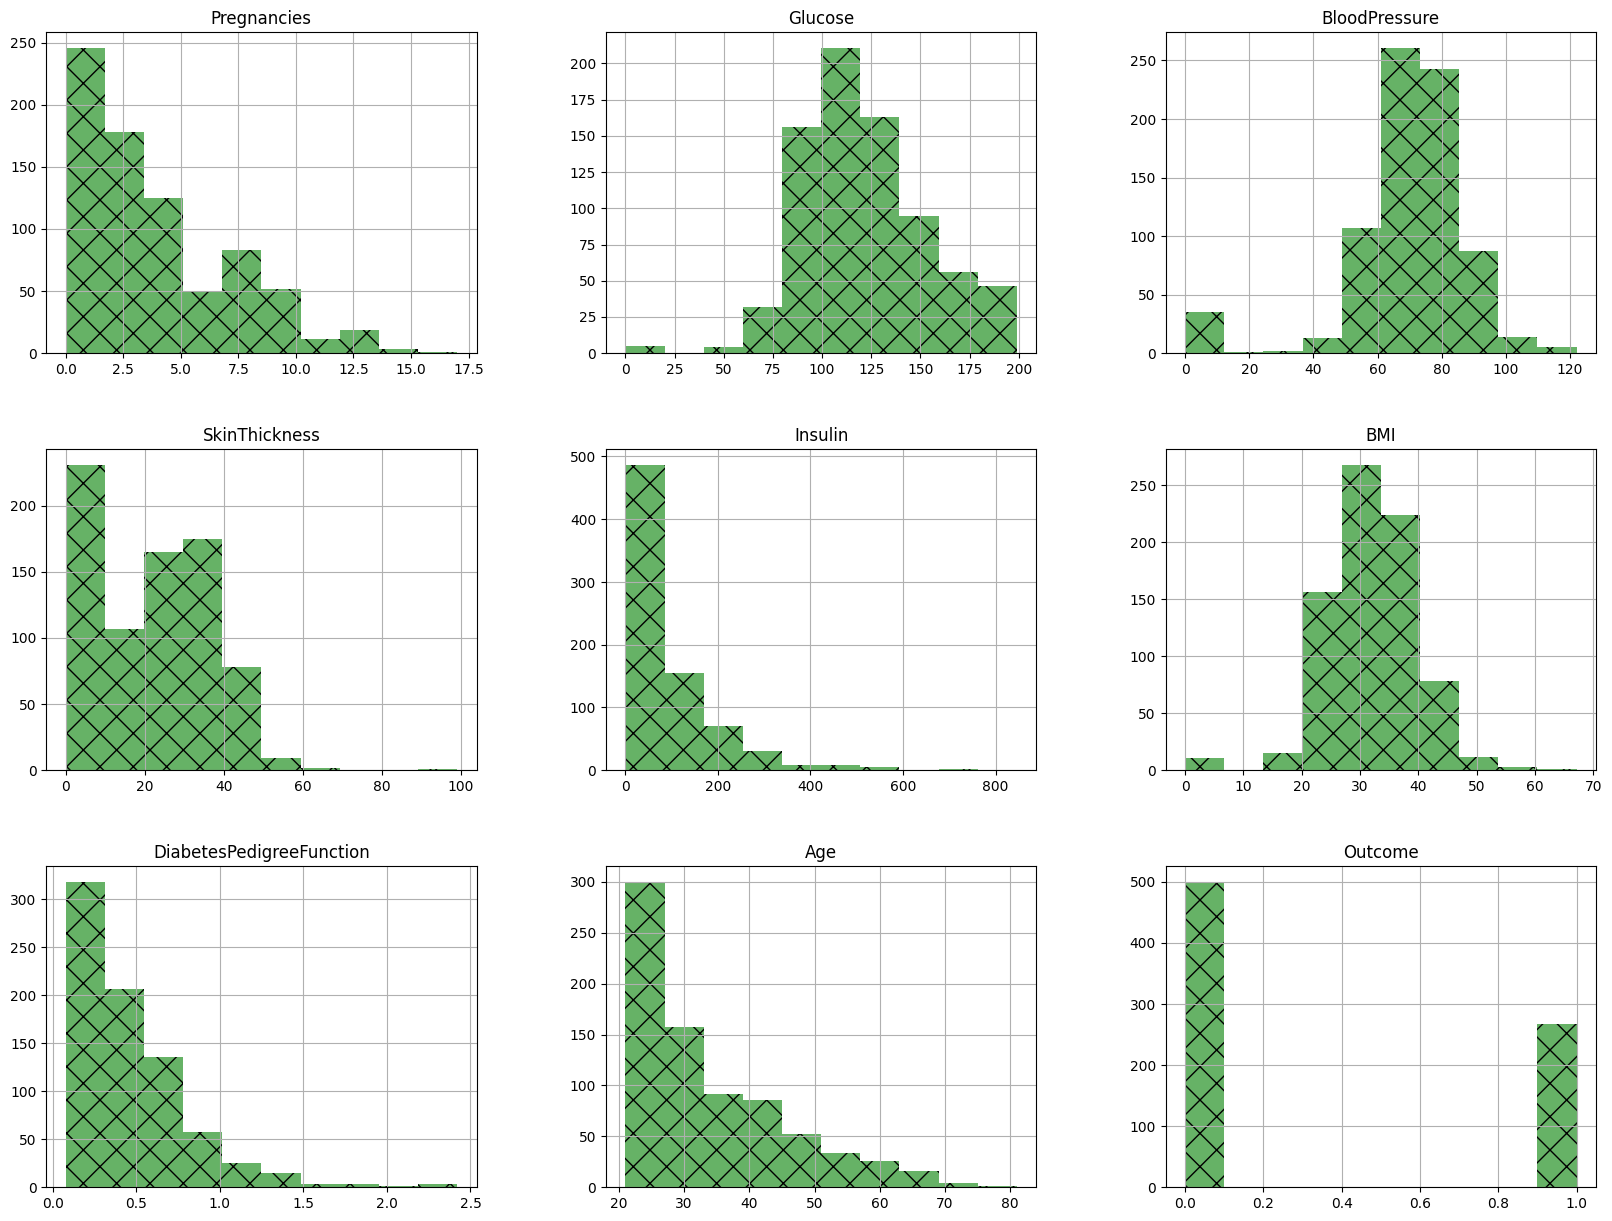

In [10]:
w = 5
df.hist(bins=10, figsize=(20,15), color='green', alpha=0.6, hatch='X', rwidth=w)

X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

xtr, xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=4)

sc = StandardScaler()

xtr = sc.fit_transform(xtr)
xte = sc.fit_transform(xte)

In [18]:
knn.fit(xtr, ytr)
pred = knn.predict(xte)
print('prediction: ', pred)
print('-----------------------------------------------------')
pred_probability = knn.predict_proba(xte)
print('prediction probability: ', pred_probability)
print('-----------------------------------------------------')
pred_log_probability = knn.predict_log_proba(xte)
print('prediction log probability: ', pred_log_probability)
print('-----------------------------------------------------')
score = knn.score(xte, yte)
print('Accuracy:', score)
print('-----------------------------------------------------')
print(accuracy_score(pred, yte))
print('-----------------------------------------------------')
print(confusion_matrix(pred, yte))

prediction:  [1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 0 1 0 0 0 0]
-----------------------------------------------------
prediction probability:  [[0.  1. ]
 [0.8 0.2]
 [0.8 0.2]
 [0.4 0.6]
 [1.  0. ]
 [0.6 0.4]
 [0.2 0.8]
 [0.4 0.6]
 [0.2 0.8]
 [0.6 0.4]
 [0.2 0.8]
 [1.  0. ]
 [0.6 0.4]
 [1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 [0.2 0.8]
 [0.  1. ]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [0.4 0.6]
 [0.4 0.6]
 [0.2 0.8]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [0.4 0.6]
 [0.8 0.2]
 [0.6 0.4]
 [0.6 0.4]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [0.6 0.4]
 [0.6 0.4]
 [0.  1. ]
 [0.  1. ]
 [0.8 0.2]
 [0.2 0.8]
 [0.6 0.4]
 [0.6 0.4]
 [0.8 0.2]
 [0.2 0.8]
 [1.  0. ]
 [0.8 0.2]
 [0.6 0.4]
 [0.4 0.6]
 [0.8 0.2]
 [1.  0. ]
 [0.  1. ]
 [0.8 0.2]
 [1.  0. ]
 [0.6 0.4]


e:\College\The Main Graduation Project\PrediKit\predikit\models\classification\classifiers.py:71: RuntimeWarning: divide by zero encountered in log
  return log(self.predict_proba(X))
